In [ ]:
#Supervised Learning- Regression

In [ ]:
##LINEAR REGRESSION

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
# Load the dataset
data = pd.read_csv('medical price dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
data.shape

(1338, 7)

In [ ]:
# Split the data into input (X) and output (y) variables
X = data['age'].values
y = data['charges'].values

In [30]:
# Normalize the input data
X = (X - np.mean(X)) / np.std(X)

In [31]:
# Initialize model parameters
intercept = 0
slope = 0

In [32]:
# Define the cost function (mean squared error)
def cost_function(X, y, intercept, slope):
    predictions = intercept + slope * X
    error = np.mean((predictions - y) ** 2)
    return error


In [33]:
# Implement gradient descent
def gradient_descent(X, y, intercept, slope, learning_rate, num_iterations):
    m = len(X)
    for iteration in range(num_iterations):
        predictions = intercept + slope * X
        errors = predictions - y
        gradient_intercept = (2 / m) * np.sum(errors)
        gradient_slope = (2 / m) * np.sum(errors * X)
        intercept -= learning_rate * gradient_intercept
        slope -= learning_rate * gradient_slope
    return intercept, slope


In [34]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model
intercept, slope = gradient_descent(X, y, intercept, slope, learning_rate, num_iterations)


In [35]:
# Make predictions
new_X= np.random.randint(1,500,1338)  # Example new input data
normalized_new_X = (new_X - np.mean(X)) / np.std(X)
predictions = intercept + slope * normalized_new_X
predictions

array([ 900082.02277416,  986953.36323437, 1338058.36426107, ...,
        378853.98001287,   20509.70061449, 1750697.23144708])

In [36]:
print(y.shape)

(1338,)


In [37]:
print(predictions.shape)

(1338,)


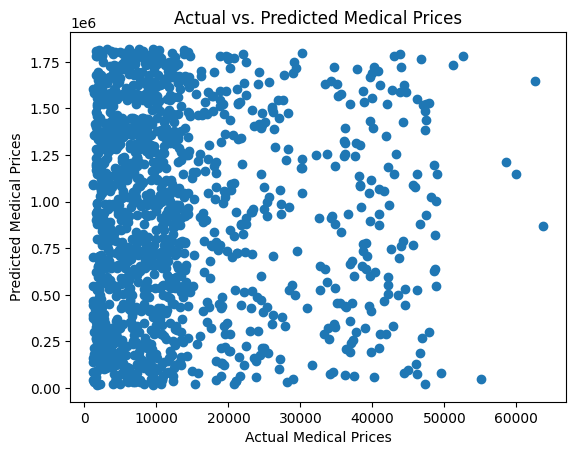

In [38]:
# Plot the actual target values vs. the predicted values
plt.scatter(y, predictions)
plt.xlabel('Actual Medical Prices')
plt.ylabel('Predicted Medical Prices')
plt.title('Actual vs. Predicted Medical Prices')
plt.show()
